# AS2--Gradient Descent

Richard Yang

### Part A: Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the data

df = pd.read_csv('bottle.csv')
df.head(3)

C:\Users\Richa\AppData\Local\Temp\ipykernel_22924\1533238905.py:6: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
#2 
columns = ['T_degC', 'Salnty', 'STheta','O2ml_L','Depthm']
df = df[columns]
df.dropna(inplace=True)

print(df.shape)

(661268, 5)


C:\Users\Richa\AppData\Local\Temp\ipykernel_23540\2510290537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [77]:
df.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
2160,10.30,33.030,25.364,5.90,0
2161,18.46,32.920,23.568,6.02,6
2162,10.29,32.951,25.304,6.04,10
2163,10.29,32.990,25.335,6.06,15
2164,10.33,33.005,25.339,6.04,20


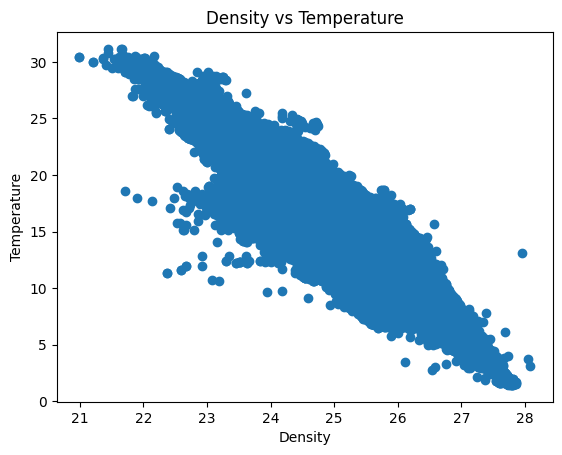

In [78]:
#3

import matplotlib.pyplot as plt

plt.scatter(df['STheta'], df['T_degC'])
plt.title('Density vs Temperature')
plt.xlabel('Density')
plt.ylabel('Temperature')
plt.show()



As we can see from the plot, the outliers have been removed


In [79]:
df = df[df['STheta'] < 200]
df.shape

(661268, 5)

## Part B: Train / Test Split & Scaling

In [80]:
import sklearn
from sklearn.model_selection import train_test_split

X = df[columns].drop('T_degC', axis=1)
y = df['T_degC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((529014, 4), (132254, 4), (529014,), (132254,))

In [81]:
X_train.head()


,Salnty,STheta,O2ml_L,Depthm
37089,33.490,25.154,6.10,9
372192,34.069,26.593,2.26,250
592472,33.723,25.837,3.47,125
801370,33.451,25.620,4.43,100
789777,33.690,24.290,6.39,11


In [82]:
# Use StandardScaler to scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_test_scaled.shape, X_train_scaled.shape

((132254, 4), (529014, 4))

## Part C: Linear Regression with sklearn



In [83]:
# 1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

#2) Print out the coefficients (including the intercept)

print(lin_reg.intercept_)

print(lin_reg.coef_)

# 3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled! Call predictions y_pred_mgd

y_pred_sklearn = lin_reg.predict(X_test_scaled)

# 4）Calculate metrics

from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score

MSE = mean_squared_error(y_test, y_pred_sklearn)
R2 = r2_score(y_test, y_pred_sklearn)
Var = explained_variance_score(y_test, y_pred_sklearn)
dict = {'MSE': [MSE], 'R2': [R2], 'Var': [Var]}
dfdict = pd.DataFrame(dict)
dfdict

10.914783098367892
[ 1.63043136 -4.63255939  0.30116055 -0.47546539]


,MSE,R2,Var
0,0.110191,0.993829,0.993829


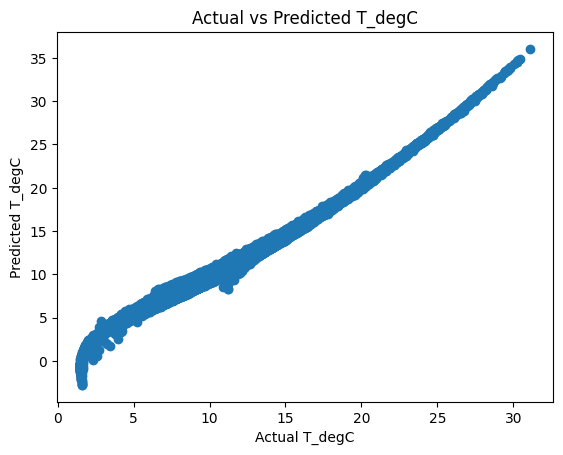

In [84]:
# 5) Create a scatterplot that shows actual versus predicted values for the T_degC

plt.scatter(y_test, y_pred_sklearn)

plt.title('Actual vs Predicted T_degC')

plt.xlabel('Actual T_degC')

plt.ylabel('Predicted T_degC')

plt.show()

## Part D: Gradient Descent Mini-Batch

Please make sure you are using Mini-Batch! Perform the following six steps for mini-batch sizes of: 50, 250, & 2000. Save all outputs

In [85]:
# add a column of 1s to X_train_scaled and X_test_scaled.
import numpy as np
from sklearn.preprocessing import add_dummy_feature

X_train_scaled= add_dummy_feature(X_train_scaled)
X_test_scaled= add_dummy_feature(X_test_scaled)

X_train_scaled.shape, X_test_scaled.shape

((529014, 5), (132254, 5))

In [86]:
y_train_new = y_train.values.reshape(-1,1)

y_train_new.shape

(529014, 1)

In [87]:
from math import ceil

def loss_func(X, y, theta):
    aa = np.dot(X, theta)
    bb = np.dot((aa - y).transpose(), (aa - y))
    bb /= 2
    return bb[0]


def learning_schedule(t):
    t0, t1 = 200, 1000  # learning schedule hyperparameters
    return t0 / (t + t1)

def minibatch_GD(X_train_scaled, y, n_epochs, minibatch_size, eta, random_state = 123):
    m = len(X_train_scaled)
    n_batches_per_epoch = ceil(m / minibatch_size)
    theta = np.random.randn(X_train_scaled.shape[1], 1)

    theta_path_mgd = []
    loss_list = []

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_train_scaled[shuffled_indices]
        y_shuffled = y[shuffled_indices] 
        
        for iteration in range(0, n_batches_per_epoch):
            idx = iteration * minibatch_size
            xi = X_b_shuffled[idx : idx + minibatch_size]
            yi = y_shuffled[idx : idx + minibatch_size]
            gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
            theta = theta - eta * gradients
            loss_value = loss_func(xi, yi, theta)
            theta_path_mgd.append(theta) 
            loss_list.append(loss_value) 

    return theta_path_mgd, loss_list


### minibatch_size = 50

In [88]:
# Call the function for minibatch_size = 50

theta_path_mgd, loss_path_mgd = minibatch_GD(X_train_scaled=X_train_scaled, y=y_train_new, minibatch_size = 50, eta = 0.1, n_epochs = 100, random_state = 123)

# combine the theta and cost values into a list
pathlist = list(zip(theta_path_mgd, loss_path_mgd))
# sort the list
pathlist_sorted = sorted(pathlist, key=lambda x: x[1])
# get the minimal cost theta
min_cost_theta = pathlist_sorted[0][0]
# get the minimal cost value
min_cost_value = pathlist_sorted[0][1]
# print the minimal cost value and theta
print('The minimal cost value is: ', min_cost_value)
print('The minimal cost theta is: ', min_cost_theta)


The minimal cost value is:  [0.13936542]
The minimal cost theta is:  [[10.92969544]
 [ 1.60173246]
 [-4.61386707]
 [ 0.2549791 ]
 [-0.52213663]]


In [89]:
# Get the predicted value

y_pred_mgd = X_test_scaled @ min_cost_theta
y_pred_train = X_train_scaled @ min_cost_theta

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score

MSE = mean_squared_error(y_test, y_pred_mgd)
R2 = r2_score(y_test, y_pred_mgd)
Var = explained_variance_score(y_test, y_pred_mgd)
dict = {'MSE': [MSE], 'R2': [R2], 'Var': [Var]}
dfdict = pd.DataFrame(dict)
dfdict

,MSE,R2,Var
0,0.112447,0.993703,0.993716


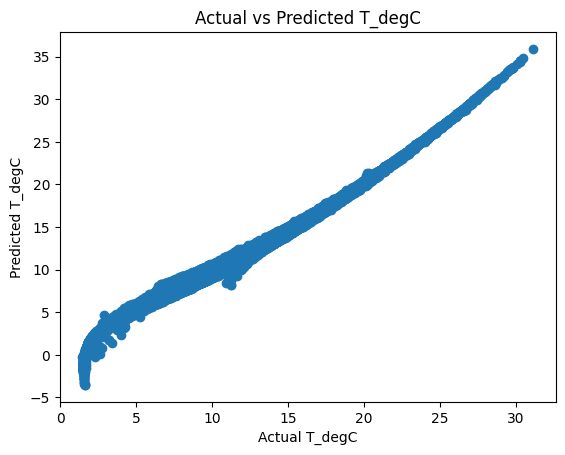

In [90]:
# Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

plt.scatter(y_test, y_pred_mgd)

plt.title('Actual vs Predicted T_degC')

plt.xlabel('Actual T_degC')

plt.ylabel('Predicted T_degC')

plt.show()

In [91]:
# Caculate metrics for the train data
MSE = mean_squared_error(y_train, y_pred_train)
R2 = r2_score(y_train, y_pred_train)
Var = explained_variance_score(y_train, y_pred_train)
dict = {'MSE': [MSE], 'R2': [R2], 'Var': [Var]}
dfdict = pd.DataFrame(dict)
dfdict


,MSE,R2,Var
0,0.112919,0.993672,0.993684


### minibatch_size = 250

In [92]:
# Call the function for minibatch_size = 250

theta_path_mgd, loss_path_mgd = minibatch_GD(X_train_scaled=X_train_scaled, y=y_train_new, minibatch_size = 250, eta = 0.1, n_epochs = 100, random_state = 123)

# combine the theta and cost values into a list
pathlist = list(zip(theta_path_mgd, loss_path_mgd))
# sort the list
pathlist_sorted = sorted(pathlist, key=lambda x: x[1])
# get the minimal cost theta
min_cost_theta = pathlist_sorted[0][0]
# get the minimal cost value
min_cost_value = pathlist_sorted[0][1]
# print the minimal cost value and theta
print('The minimal cost value is: ', min_cost_value)
print('The minimal cost theta is: ', min_cost_theta)


The minimal cost value is:  [0.04878725]
The minimal cost theta is:  [[10.91468559]
 [ 1.60982735]
 [-4.63650932]
 [ 0.30908561]
 [-0.428587  ]]


In [93]:
# Get the predicted value

y_pred_mgd = X_test_scaled @ min_cost_theta
y_pred_train = X_train_scaled @ min_cost_theta

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score

MSE = mean_squared_error(y_test, y_pred_mgd)
R2 = r2_score(y_test, y_pred_mgd)
Var = explained_variance_score(y_test, y_pred_mgd)
dict = {'MSE': [MSE], 'R2': [R2], 'Var': [Var]}
dfdict = pd.DataFrame(dict)
dfdict

,MSE,R2,Var
0,0.11148,0.993757,0.993757


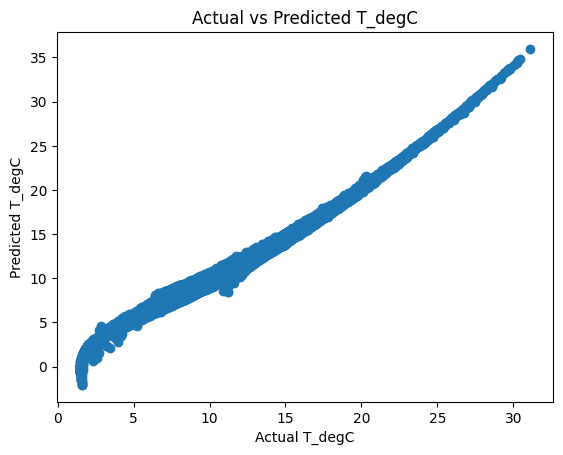

In [94]:
# Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

plt.scatter(y_test, y_pred_mgd)

plt.title('Actual vs Predicted T_degC')

plt.xlabel('Actual T_degC')

plt.ylabel('Predicted T_degC')

plt.show()

In [95]:
# Caculate metrics for the train data
MSE = mean_squared_error(y_train, y_pred_train)
R2 = r2_score(y_train, y_pred_train)
Var = explained_variance_score(y_train, y_pred_train)
dict = {'MSE': [MSE], 'R2': [R2], 'Var': [Var]}
dfdict = pd.DataFrame(dict)
dfdict


,MSE,R2,Var
0,0.112168,0.993714,0.993714


### minibatch_size = 2000

In [96]:
# Call the function for minibatch_size = 2000

theta_path_mgd, loss_path_mgd = minibatch_GD(X_train_scaled=X_train_scaled, y=y_train_new, minibatch_size = 2000, eta = 0.1, n_epochs = 100, )
random_state = 123
# combine the theta and cost values into a list
pathlist = list(zip(theta_path_mgd, loss_path_mgd))
# sort the list
pathlist_sorted = sorted(pathlist, key=lambda x: x[1])
# get the minimal cost theta
min_cost_theta = pathlist_sorted[0][0]
# get the minimal cost value
min_cost_value = pathlist_sorted[0][1]
# print the minimal cost value and theta
print('The minimal cost value is: ', min_cost_value)
print('The minimal cost theta is: ', min_cost_theta)


The minimal cost value is:  [43.51350775]
The minimal cost theta is:  [[10.91754945]
 [ 1.63732406]
 [-4.64075762]
 [ 0.2977043 ]
 [-0.47093874]]


In [97]:
# Get the predicted value

y_pred_mgd = X_test_scaled @ min_cost_theta
y_pred_train = X_train_scaled @ min_cost_theta

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score

MSE = mean_squared_error(y_test, y_pred_mgd)
R2 = r2_score(y_test, y_pred_mgd)
Var = explained_variance_score(y_test, y_pred_mgd)
dict = {'MSE': [MSE], 'R2': [R2], 'Var': [Var]}
dfdict = pd.DataFrame(dict)
dfdict

,MSE,R2,Var
0,0.110258,0.993825,0.993826


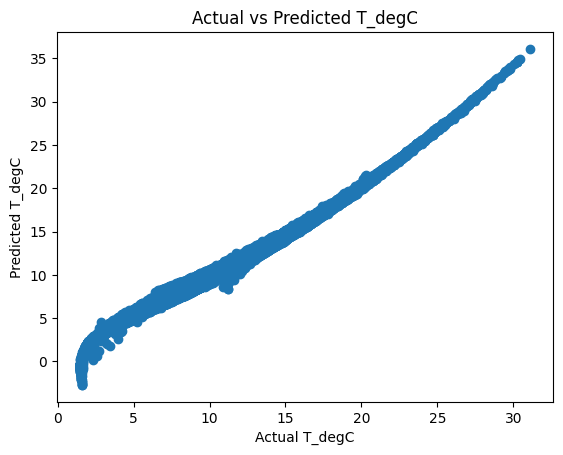

In [98]:
# Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

plt.scatter(y_test, y_pred_mgd)

plt.title('Actual vs Predicted T_degC')

plt.xlabel('Actual T_degC')

plt.ylabel('Predicted T_degC')

plt.show()

In [99]:
# Caculate metrics for the train data
MSE = mean_squared_error(y_train, y_pred_train)
R2 = r2_score(y_train, y_pred_train)
Var = explained_variance_score(y_train, y_pred_train)
dict = {'MSE': [MSE], 'R2': [R2], 'Var': [Var]}
dfdict = pd.DataFrame(dict)
dfdict


,MSE,R2,Var
0,0.11087,0.993787,0.993787


## Part E: Conceptual Questions

1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.

2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.

4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

5) Why would a data scientist want to use early stopping in gradient descent? 

--(1) 

Gradient descent is an iterative optimization algorithm that can handle large datasets and is more flexible in terms of the types of models it can optimize. However, it requires tuning hyperparameters such as the learning rate and the number of iterations, and it may converge to a local minimum instead of the global minimum.

Normal equation is a closed-form solution that does not require any hyperparameter tuning and can handle small to medium-sized datasets. However, it may not work for more complex models, and it can be computationally expensive for large datasets.

--(2)

Stochastic Gradient Descent (SGD) updates the parameters after each training example in the dataset. This leads to a higher computational efficiency and it is more stuitable for large datasets. 

The Mini-Batch Gradient Descent updates the parameters after processing a small random subset of the training data at each iteration

In comparison with Mini- Batch GD, SGD might be unstable and prone to generate more noise because the gradient can fluctuate significantly from one example to the next.


--(3)

After camparing the metrics, I found that when mini batch size = 2000, the model has the best performance with the smallest test MSE and highest test R2 AND explained variance. 

After comparing the test and train metrics for the Min-batch GD model with hyperparameter mini batch size = 2000, I found that the metrics for test data has been improved than the metrics for the train data. The MSE is lower, simultanously, the R2 and Var is higher in the test data. Therefore, this version of gradient descent does not show signs of overfitting.

--(4)

The learning rate in gradient descent is a hyperparameter which can control step size at each iteration. Dynamiclly changing the learning rate over time can be helpful for several reasons. 

Firstly, it can help the model to escape local minima by gradually decreasing the learning rate, allowing the model to settle into the optimal solution. Secondly, it can help the model to converge more smoothly by reducing the oscillations caused by a high learning rate. Thirdly, it can speed up the convergence by starting with a high learning rate and gradually decreasing it as the model approaches the optimal solution. Finally, learning rate scheduling can also help the model to generalize better by preventing overfitting to the training data.

--(5)

1. Saving the time: Early stopping can save time and resources by stopping the training process when further training is unlikely to improve the validation error.

2. prevent overfitting: Early stopping helps to prevent overfitting by stopping the training process before the model has a chance to memorize the training data.

3. Improve the model's generalization ability: Early stopping can improve the generalization of the model by preventing it from learning spurious patterns in the training data that do not generalize well to new data.

4. Generate more rebust model: The early stopping can facilate the model to be less sentistive to small changes in the training data or the hyperparameters, making it more robust and reliable.